In [3]:
import pickle
import numpy as np
import pylab as plt
import os
from scipy.optimize import curve_fit
%matplotlib inline

In [9]:
# Quick function to add 2 dictionaries elementwise
def AddDicts(dat1,dat2):
    dat3={}
    for k in dat1.keys():
        dat3[k]=dat1[k]+dat2[k]
    return(dat3)

ExposureTime=0.5

In [69]:
dat={}
Root="/Users/ben.jones/Documents/Data/MicroscopePaper/OnSlides/"
for path in os.listdir(Root):
    #if('Vac' in path):
        FileName=Root+"/"+path+"/spots/spots.dat"
    
        try:
            f=open(FileName,'rb')
            dat[path]=pickle.load(f)
            f.close()
        except:
            print("no file at " +FileName)
            
datOff={}
Root="/Users/ben.jones/Documents/Data/MicroscopePaper/OffSlides/"
for path in os.listdir(Root):
    #if('Vac' in path):
        FileName=Root+"/"+path+"/spots/spots.dat"
    
        try:
            f=open(FileName,'rb')
            datOff[path]=pickle.load(f)
            f.close()
        except:
            print("no file at " +FileName)

no file at /Users/ben.jones/Documents/Data/MicroscopePaper/OnSlides//.DS_Store/spots/spots.dat
no file at /Users/ben.jones/Documents/Data/MicroscopePaper/OffSlides//.DS_Store/spots/spots.dat


In [11]:
# See what keys we have in these dicts
print(dat.keys())
print(dat['Air'].keys())

dict_keys(['10BarXe', 'Air', '10barAr', '10BarXe_Long', 'Vac'])
dict_keys(['Heights', 'Times', 'Confs', 'Traces', 'X', 'Y', 'Im', 'IntegralBefore', 'IntegralAfter', 'Integral'])


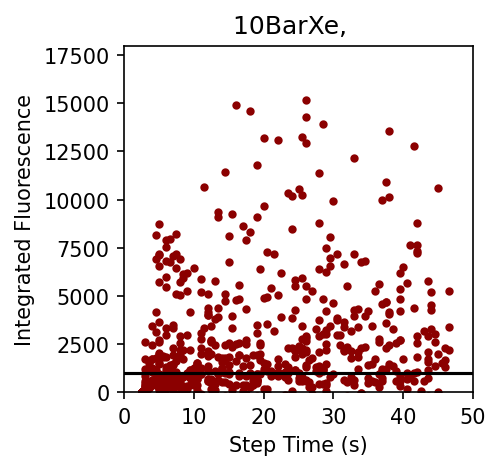

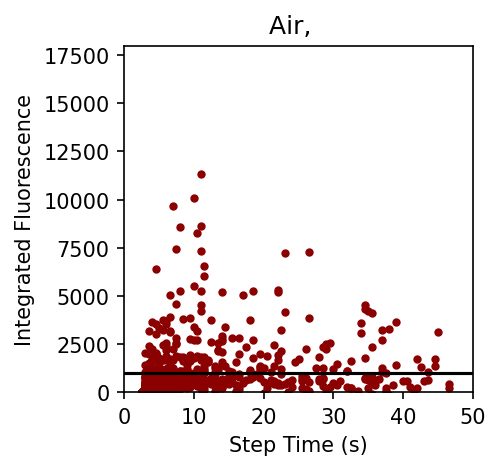

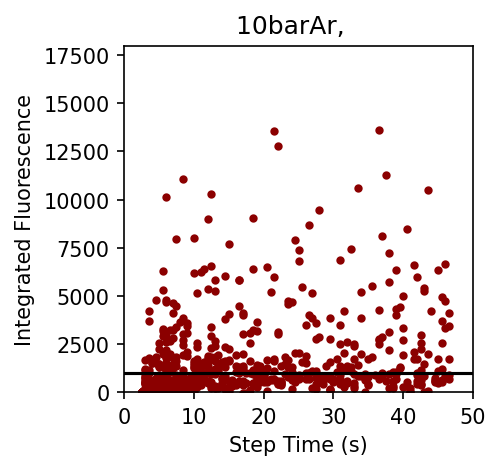

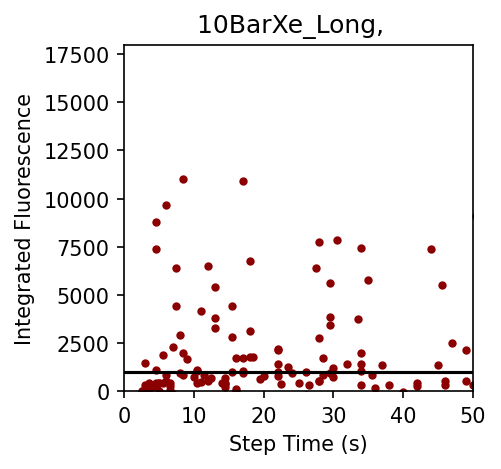

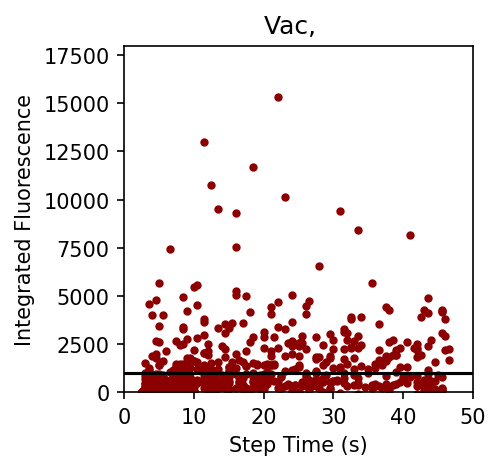

In [68]:
for k in dat.keys():
    plt.figure(figsize=(3,3),dpi=150)
    plt.plot(np.array(dat[k]['Times'])*ExposureTime,np.array(dat[k]['IntegralBefore'])/np.array(dat[k]['Times']),'.',color='DarkRed')
    plt.title(k+",  ")
    plt.xlabel("Step Time (s)")
    plt.ylabel("Integrated Fluorescence")
    plt.ylim(0,18000)
    plt.xlim(0,50)
    plt.plot([0,100],[1000,1000],'-',color='black')
    plt.savefig("Plots/SpotPlots/On"+k+".png",dpi=200,bbox_inches='tight')
    plt.show()
    

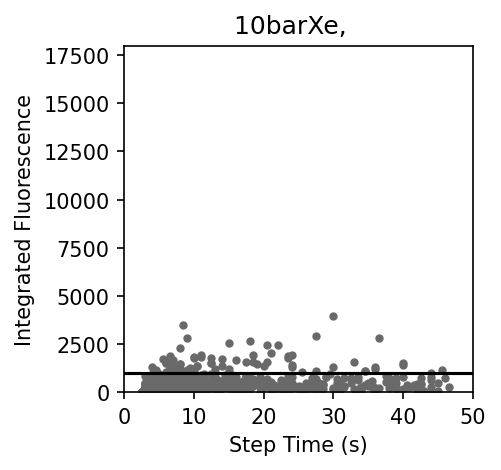

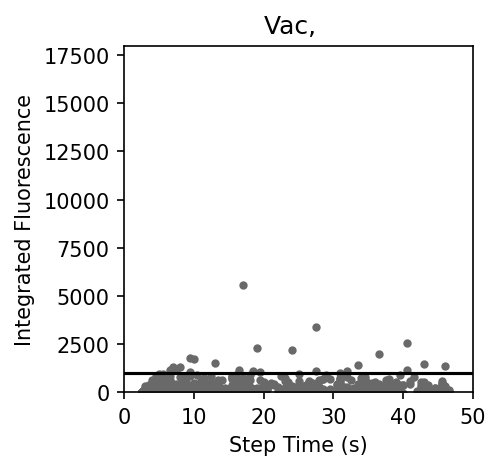

In [71]:
for k in datOff.keys():
    plt.figure(figsize=(3,3),dpi=150)
    plt.plot(np.array(datOff[k]['Times'])*ExposureTime,np.array(datOff[k]['IntegralBefore'])/np.array(datOff[k]['Times']),'.',color='dimgrey')
    plt.title(k+",  ")
    plt.xlabel("Step Time (s)")
    plt.ylabel("Integrated Fluorescence")
    plt.ylim(0,18000)
    plt.xlim(0,50)
    plt.plot([0,100],[1000,1000],'-',color='black')
    plt.savefig("Plots/SpotPlots/Off"+k+".png",dpi=200,bbox_inches='tight')
    plt.show()

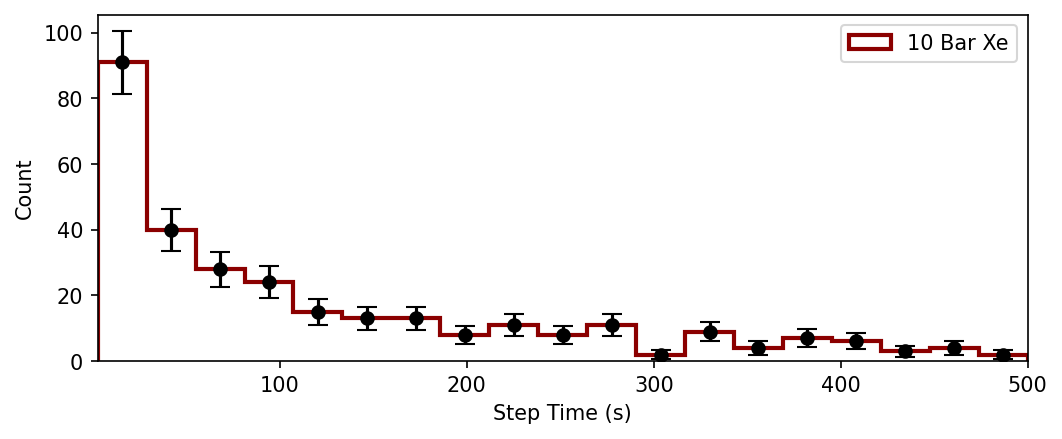

In [62]:
Which='10BarXe_Long'
maxs=np.array([np.max(i) for i in dat[Which]['Traces']])
mins=np.array([np.min(i) for i in dat[Which]['Traces']])
stepfrac=np.array(dat[Which]['Heights'])/(maxs-mins)


plt.figure(figsize=(8,3),dpi=150)
h=plt.hist(np.array(dat[Which]['Times'])*ExposureTime,histtype='step',bins=np.linspace(2.5,500,20),color='DarkRed',label='10 Bar Xe',linewidth=2)
xsXe=(h[1][1:]+h[1][:-1])/2
ysXe=h[0]
plt.errorbar(xsXe,ysXe,np.sqrt(ysXe),fmt='o',capsize=5,color='black')
plt.xlim(2.5,500)




#plt.semilogy()
plt.xlabel("Step Time (s)")
plt.ylabel("Count")
#plt.xlim(0,32000)
#plt.plot(varst,sumfunc*2000,label='Intensity profile weighted fit')
#plt.xlim(0,30000)
#plt.xlim(0,25000-6*250)
plt.legend(loc='upper right')

MeanXeLifetime=np.mean(np.array(dat[Which]['Times']))*ExposureTime

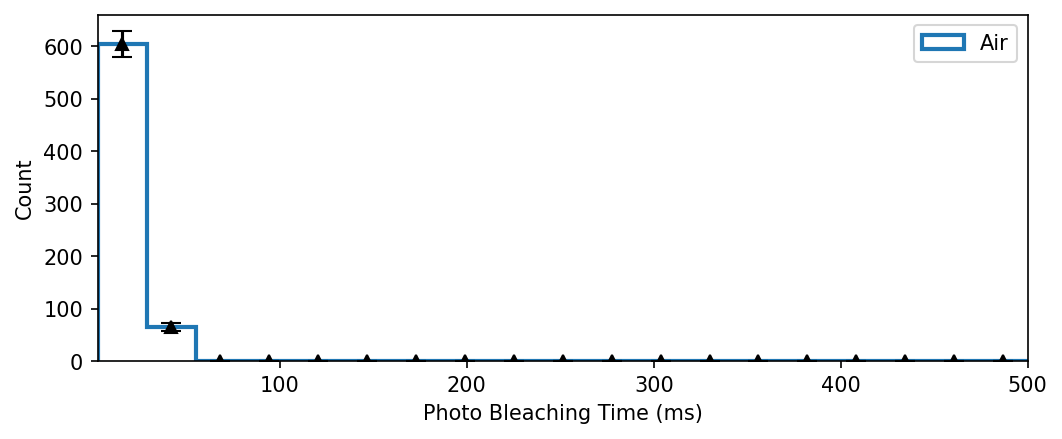

In [63]:
plt.figure(figsize=(8,3),dpi=150)
h=plt.hist(np.array(dat['Air']['Times'])*ExposureTime,histtype='step',bins=np.linspace(2.5,500,20),label='Air',linewidth=2)
xsAir=(h[1][1:]+h[1][:-1])/2
ysAir=h[0]
plt.errorbar(xsAir,ysAir,np.sqrt(ysAir),fmt='^',capsize=5,color='black')


plt.xlim(2.5,500)

#plt.semilogy()
plt.xlabel("Photo Bleaching Time (ms)")
plt.ylabel("Count")
#plt.xlim(0,32000)
#plt.plot(varst,sumfunc*2000,label='Intensity profile weighted fit')
#plt.xlim(0,30000)
#plt.xlim(0,25000-6*250)
plt.legend(loc='upper right')

MeanAirLifetime=np.mean(np.array(dat['Air']['Times']))*ExposureTime

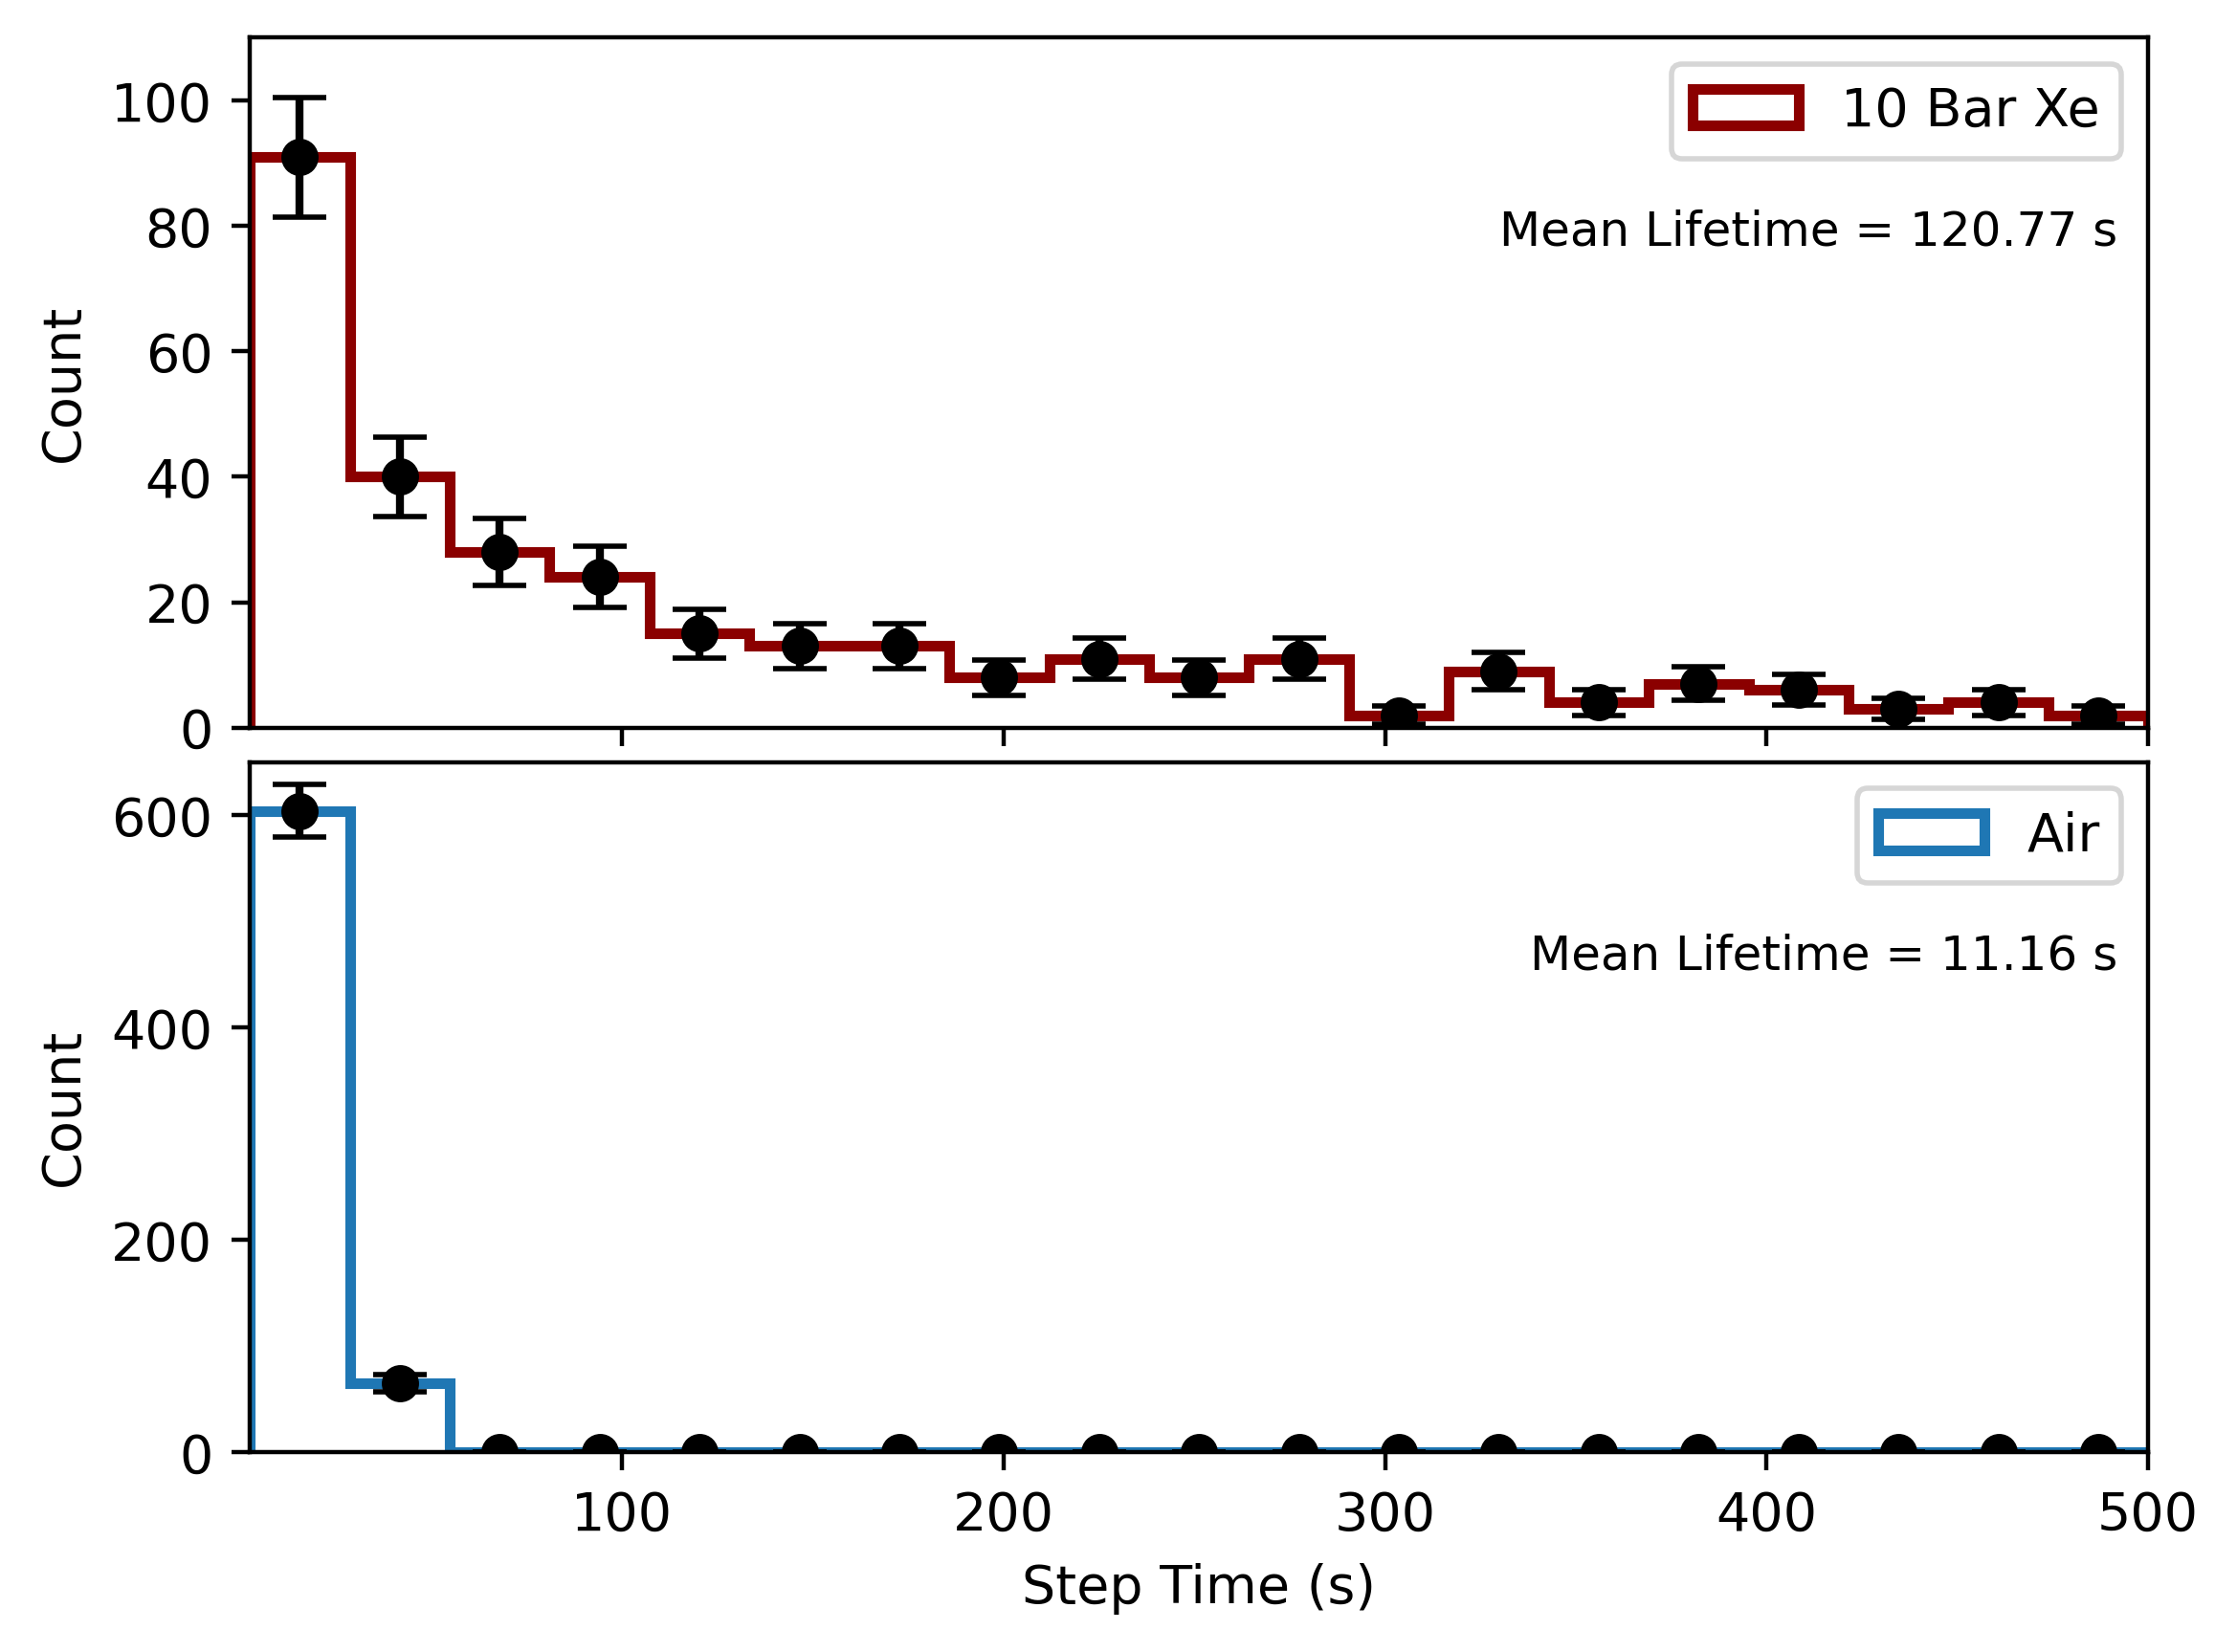

<Figure size 640x480 with 0 Axes>

In [65]:

fig, axs = plt.subplots(2, 1, sharex=True,dpi=400)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.05)

axs[0].hist(np.array(dat["10BarXe_Long"]['Times'])*ExposureTime,histtype='step',bins=np.linspace(2.5,500,20),color='DarkRed',label='10 Bar Xe',linewidth=2)
axs[0].errorbar(xsXe,ysXe,np.sqrt(ysXe),fmt='o',capsize=5,color='black')
axs[0].set_xlim(2.5,500)
ymax=110
axs[0].set_ylim(0,ymax)
axs[0].text(500,ymax*0.7,"Mean Lifetime = " + str(round(MeanXeLifetime,2)) + " s  ",ha='right',fontsize=9)

axs[1].hist(np.array(dat["Air"]['Times'])*ExposureTime,histtype='step',bins=np.linspace(2.5,500,20),color='tab:blue',label='Air',linewidth=2)
axs[1].errorbar(xsAir,ysAir,np.sqrt(ysAir),fmt='o',capsize=5,color='black')
axs[1].set_xlim(2.5,500)

ymax=650
axs[1].set_ylim(0,ymax)
axs[1].text(500,ymax*0.7,"Mean Lifetime = " + str(round(MeanAirLifetime,2)) + " s  ",ha='right',fontsize=9)



#plt.semilogy()
plt.xlabel("Step Time (s)")
axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')

plt.show()
plt.savefig("Plots/TimePlot.png",dpi=200,bbox_inches='tight')

In [75]:
Which

'10BarXe_Long'

141,2,271,351,


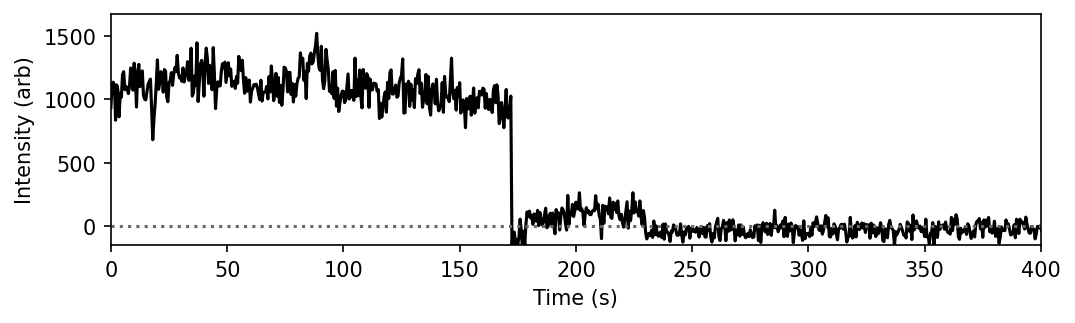

37,1,389,225,


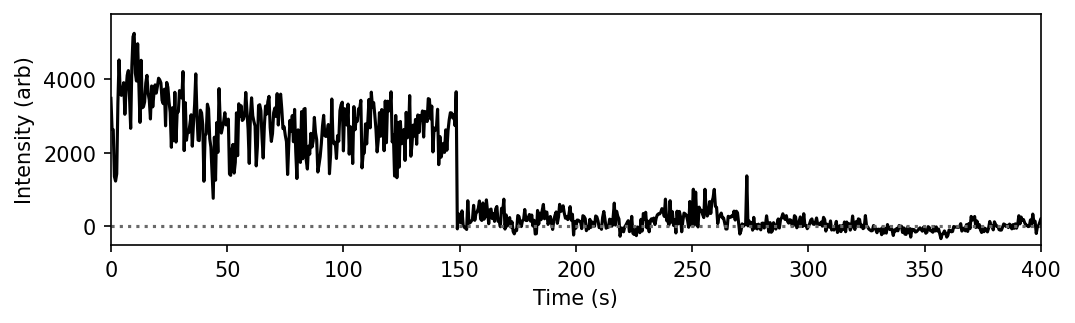

84,1,354,287,


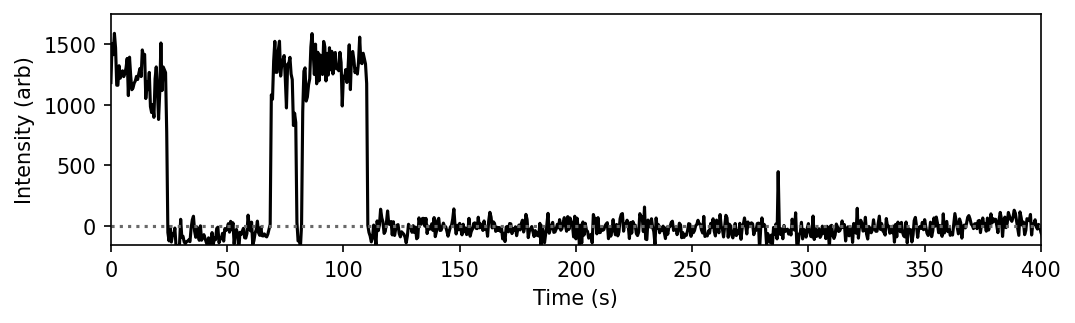

221,3,315,364,


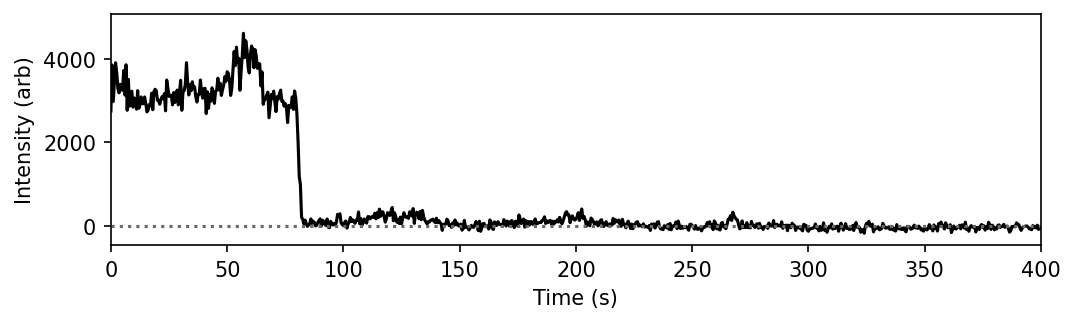

245,3,373,202,


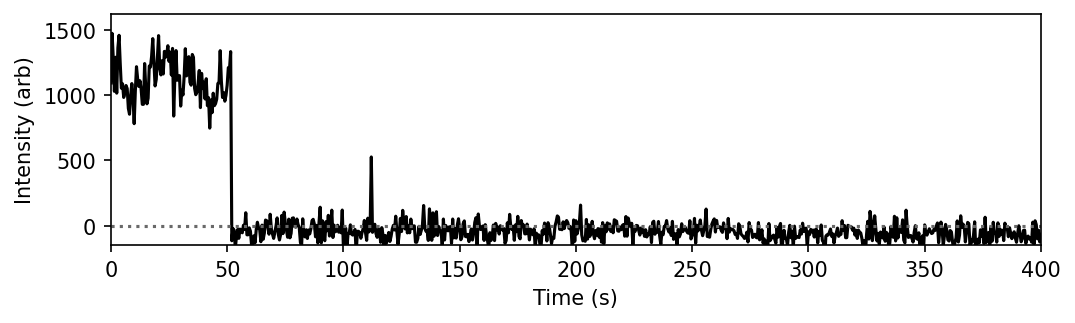

In [81]:
PickedOuti=[141,37,84,221,245]

#Make all the time traces
maxs=np.array([np.max(i) for i in dat[Which]['Traces']])
mins=np.array([np.min(i) for i in dat[Which]['Traces']])
stepfrac=np.array(dat[Which]['Heights'])/(maxs-mins)
selected=stepfrac>0.3

for i in PickedOuti:
    if(stepfrac[i]>0.30):
        plt.figure(figsize=(8,2),dpi=150)
        plt.plot(np.arange(len(dat[Which]['Traces'][i]))*ExposureTime,dat[Which]['Traces'][i],color='black')
#        plt.title(str(i)+", "+str(dat[Which]['Heights'][i]))
        plt.xlabel("Time (s)")
        plt.ylabel("Intensity (arb)")
        plt.xlim(0,400)
        plt.plot([0,400],[0,0],':',color='dimgrey')
        plt.ylim(-0.1*np.max(dat[Which]['Traces'][i]),np.max(dat[Which]['Traces'][i])*1.1)
        print(str(i)+","+str(dat[Which]['Im'][i])+"," + str(dat[Which]['X'][i])+"," + str(dat[Which]['Y'][i])+"," )
        plt.savefig("Plots/SingleMolecules/Trace"+str(i)+".png",dpi=200,bbox_inches='tight')
        plt.show()
